In [35]:
import json
import pandas as pd

fpath='/local0/Kariz/expriments/simulator/multidag/multidag_run_md_0_sjf.json'

with open(fpath, 'r') as fd:
    raw_data = json.loads(fd.read())
    
    for it in raw_data:
        round_stats = raw_data[it]
        round_cached = 0
        round_total = 0
        for gid in round_stats:
            dag_stats = round_stats[gid]['stats']            
            for stat in dag_stats:
                round_cached += stat['cached_size']
                round_total += stat['total_size']
        print(it, round_cached, round_total)
            

0 655 4891
1 375 5870


In [51]:
fpath='/local0/Kariz/expriments/simulator/multidag/multidag_run_md_8_cmr.json'

with open(fpath, 'r') as fd:
    raw_data = json.loads(fd.read())
    
    for it in raw_data:
        round_stats = raw_data[it]
        round_cached = 0
        round_total = 0
        for gid in round_stats:
            dag_stats = round_stats[gid]['stats']            
            for stat in dag_stats:
                round_cached += stat['cached_size']
                round_total += stat['total_size']
        print(it, round_cached, round_total)
            

0 2428 4891
1 3751 5870
2 2696 2923
3 2851 3751
4 3235 5412
5 2368 2763
6 2826 3018
7 3980 4783
8 2357 4969
9 3109 3630


In [242]:
fpaths=['/local0/Kariz/expriments/simulator/multidag/multidag_run_md_4_cmr.json', 
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_10_cmr.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_8_sjf.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_4_sjf.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_6_sjf.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_0_sjf.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_10_sjf.json',
       '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_2_sjf.json',]

df_data = []
        
for fpath in fpaths:
    shared, alg = fpath.split('/')[-1].split('.')[0].split('_')[-2:]
    print(shared, alg)
    with open(fpath, 'r') as fd:
        raw_data = json.loads(fd.read())

        for it in raw_data:
            round_stats = raw_data[it]
            round_cached = 0
            round_total = 0
            total_runtime = 0
            for gid in round_stats:
                dag_stats = round_stats[gid]['stats']            

                total_runtime = round_stats[gid]['runtime'] if total_runtime < round_stats[gid]['runtime'] else total_runtime            
                for stat in dag_stats:
                    round_cached += stat['cached_size']
                    round_total += stat['total_size']
            df_data.append({'shared': int(shared), 'alg': alg, 
                            'total': round_total, 'cache': round_cached,
                           'round': it, 'runtime': total_runtime, 'remote': round_total -  round_cached})
      #      print(it, round_cached, round_total)
df = pd.DataFrame(df_data)
df

4 cmr
8 cmr
8 sjf
4 sjf
6 sjf
0 sjf
10 sjf
2 sjf


,alg,cache,remote,round,runtime,shared,total
0,cmr,1600,3291,0,378.024178,4,4891
1,cmr,1727,4143,1,533.938956,4,5870
2,cmr,1530,1393,2,455.635945,4,2923
3,cmr,1721,2030,3,482.860697,4,3751
4,cmr,1920,3492,4,530.048004,4,5412
5,cmr,1257,1506,5,327.690300,4,2763
6,cmr,1767,1251,6,509.116433,4,3018
7,cmr,1977,2806,7,447.600943,4,4783
8,cmr,1993,2976,8,614.352622,4,4969
9,cmr,1697,1933,9,383.703467,4,3630


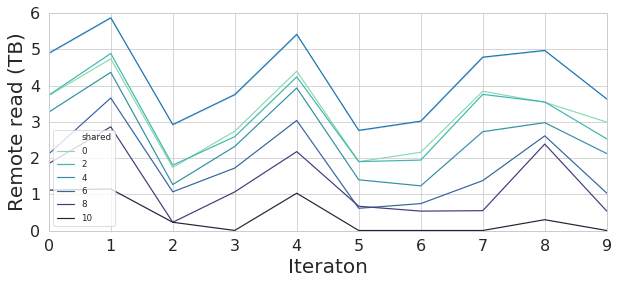

In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")


def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df, x="round", y="total", ax=ax)
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=df[df['alg'] == 'sjf'], x="round", y="remote", hue='shared', ax=ax, palette=palette)
#palette2 = sns.color_palette("mako_r", 2)
#sns.lineplot(data=df[df['alg'] == 'cmr'], x="round", y="remote", hue='shared', ax=ax, palette='mako_r')
ax.set_xlim(0, 9)
ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(1, color='#4d4d4d')
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('Iteraton', fontsize=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)






In [237]:
agg_df = df.groupby(['shared', 'alg']).agg('sum').reset_index()
agg_df

,shared,alg,cache,remote,runtime,total
0,0,sjf,10242,31768,5794.000000,42010
1,2,cmr,0,0,0.000000,42010
2,2,sjf,11085,30925,5520.000000,42010
3,4,cmr,17189,24821,4662.971545,42010
4,4,sjf,16400,25610,5305.000000,42010
5,6,sjf,24040,17970,4933.000000,42010
6,8,cmr,29601,12409,3797.562661,42010
7,8,sjf,29162,12848,4525.000000,42010
8,10,sjf,38194,3816,3773.000000,42010


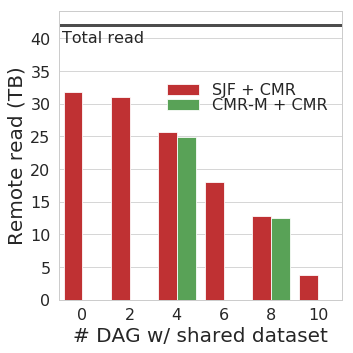

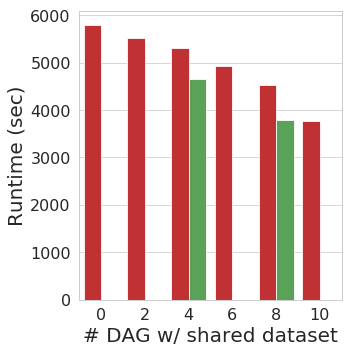

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")

def format_xticks(x, pos=None):
    print(x)
    return str(x) 

def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="remote", hue='alg', palette=['#d7191c', '#4daf4a'],ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
handles, labels = ax.get_legend_handles_labels()
labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=7, facecolor=None, framealpha=0, labelspacing=0,
         bbox_to_anchor=(1, 0.7))

ax.annotate('Total read',
            xy=(1.3, 41000),
            xytext=(0, 1),  # 3 points vertical offset
            textcoords="offset points",
            ha='right', va='top',
           fontsize=16)


plt.tight_layout()
fig.savefig('fig_cmrvssjf_remoteread.pdf', format='pdf', dpi=200)
fig.savefig('fig_cmrvssjf_remoteread.png', format='png', dpi=200)
plt.show()



fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="runtime", 
            hue='alg', palette=['#d7191c', '#4daf4a'], ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Runtime (sec)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
plt.subplots_adjust(left=0.09, bottom=0.17, right=0.995, top=0.97)


handles, labels = ax.get_legend_handles_labels()
labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=1, facecolor=None, framealpha=0, labelspacing=0.05).remove()

plt.tight_layout()
fig.savefig('fig_cmrvssjf_runtime.pdf', format='pdf', dpi=200)
fig.savefig('fig_cmrvssjf_runtime.png', format='png', dpi=200)
plt.show()
